# Question 1: Time-series prediction






Prediction can be divided into two categories: regression and classification. In regression, the numerical value of the next days is predicted for a time series. In the classification, the upward or downward trend of the time series is predicted for the next few days.

In this question, you will learn about regression mode and implement a part of:
https://ieeexplore.ieee.org/document/9005997

## Import libraries

In [92]:
!pip install --upgrade mplfinance

In [93]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import datetime
from datetime import datetime
import yfinance as yf
import mplfinance as mpf

import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## 1.1- Download data

In [94]:
table = pd.read_html('https://en.wikipedia.com/wiki/List_of_S%26P_500_companies')
table[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [95]:
New_table = table[0]

In [96]:
New_table_2 = New_table[[ datetime.strptime(dt, '%Y-%m-%d') < datetime(2010,1,1) for dt in New_table['Date added'] ] ]
New_table_2

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
...,...,...,...,...,...,...,...,...
495,WYNN,Wynn Resorts,Consumer Discretionary,Casinos & Gaming,"Paradise, Nevada",2008-11-14,1174922,2002
496,XEL,Xcel Energy,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,72903,1909
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [97]:
My_Tickers = New_table_2['Symbol'].tolist()

if 'BF.B' in My_Tickers:
    My_Tickers.remove('BF.B')

My_Tickers


['MMM',
 'ABT',
 'ADBE',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AMP',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'ADM',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BBY',
 'BIIB',
 'BA',
 'BKNG',
 'BXP',
 'BSX',
 'BMY',
 'CPB',
 'COF',
 'CAH',
 'CCL',
 'CAT',
 'CBRE',
 'COR',
 'CNP',
 'CF',
 'CHRW',
 'SCHW',
 'CVX',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'GLW',
 'COST',
 'CTRA',
 'CSX',
 'CMI',
 'CVS',
 'DHR',
 'DRI',
 'DVA',
 'DE',
 'XRAY',
 'DVN',
 'DFS',
 'DOV',
 'DHI',
 'DTE',
 'DUK',
 'EMN',
 'ETN',
 'EBAY',
 'ECL',
 'EIX',
 'EA',
 'ELV',
 'LLY',
 'EMR',
 'ETR',
 'EOG',
 'EFX',
 'EQR',
 'EL',
 'ES',
 'EXC',
 'EXPE',
 'EXPD',
 'XOM',
 'FAST',
 'FDX',
 'FIS',
 'FITB',
 'FE',
 'FI',
 'FMC',
 'F',
 'BEN',
 'GEN',
 'GD',
 'GE',
 'GIS',
 'G

In [98]:
Raw_price_for_my_tickers = yf.download(tickers=My_Tickers, start="2010-01-04", interval="1d", group_by="ticker")


[*********************100%%**********************]  289 of 289 completed


In [99]:
Raw_price_for_my_tickers['HWM']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-15,52.450001,53.259998,52.380001,52.799999,52.799999,5428500.0
2023-12-18,52.990002,53.480000,52.900002,53.189999,53.189999,1922000.0
2023-12-19,53.360001,53.880001,53.230000,53.650002,53.650002,2697000.0


In [100]:
Raw_price_for_my_tickers.head()

ECL                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2010-01-04  45.029999  45.340000  44.860001  45.250000  38.467197  1009500   
2010-01-05  45.119999  45.139999  44.310001  44.560001  37.880619  1098400   
2010-01-06  44.529999  44.849998  44.150002  44.430000  37.770126  1479700   
2010-01-07  44.520000  45.009998  44.029999  44.910000  38.178169  1350100   
2010-01-08  44.730000  45.349998  44.619999  45.290001  38.501202  1694600   

                 WELL                                   ...       CHRW  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2010-01-04  44.509998  44.959999  43.930000  44.040001  ...  58.939999   
2010-01-05  44.279999  44.740002  43.869999  44.660000  ...  57.389999   
2010-01-06  44.750000  44.950001  44.310001  44.439999  ...  57.200001   
2010-01-07  44.500000  44.860001  43.980000  44.529999  ...  56.180000   
2010-01-08  44.279999  44.549999  43.849998  44.070000  ...  56.599998   

                                                 GWW                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2010-01-04  59.340000  42.943428   822900  97.239998  97.970001  96.199997   
2010-01-05  58.110001  42.053295  2352700  96.959999  97.489998  96.139999   
2010-01-06  57.340000  41.496059  1685500  97.269997  98.250000  97.269997   
2010-01-07  56.790001  41.098038  1939600  97.269997  98.699997  96.709999   
2010-01-08  57.549999  41.648029  1332500  98.000000  99.849998  97.769997   

                                          
                Close  Adj Close  Volume  
Date                                      
2010-01-04  97.239998  76.182068  535200  
2010-01-05  97.279999  76.213432  594500  
2010-01-06  97.650002  76.503296  486800  
2010-01-07  98.570000  77.224083  650100  
2010-01-08  99.730003  78.132866  705600  

[5 rows x 1734 columns]

In [101]:
Raw_price_for_my_tickers.columns

MultiIndex([( 'ECL',      'Open'),
            ( 'ECL',      'High'),
            ( 'ECL',       'Low'),
            ( 'ECL',     'Close'),
            ( 'ECL', 'Adj Close'),
            ( 'ECL',    'Volume'),
            ('WELL',      'Open'),
            ('WELL',      'High'),
            ('WELL',       'Low'),
            ('WELL',     'Close'),
            ...
            ('CHRW',       'Low'),
            ('CHRW',     'Close'),
            ('CHRW', 'Adj Close'),
            ('CHRW',    'Volume'),
            ( 'GWW',      'Open'),
            ( 'GWW',      'High'),
            ( 'GWW',       'Low'),
            ( 'GWW',     'Close'),
            ( 'GWW', 'Adj Close'),
            ( 'GWW',    'Volume')],
           length=1734)

## 2-1. Exploring time series data and familiarizing with famous theories and libraries

#### Question 1: If the null data was at the beginning, what methods can be used to solve this problem?

If we had null data at the beginning of a time series and we want to handle it, there are several methods we can consider:

* Forward Fill (Pad): This method involves filling missing values with the last known value. This approach assumes that the future values will be similar to the most recent past values.
` Raw_price_for_my_tickers.ffill(inplace=True) `

* Backward Fill (Bfill): This method involves filling missing values with the next available value. Similar to forward fill, it assumes that the past values will be similar to the most recent future values.
`Raw_price_for_my_tickers.bfill(inplace=True)`

* Interpolation: Interpolation is a method where missing values are estimated based on the values around them. There are different interpolation methods available, such as linear interpolation, polynomial interpolation, etc.
`Raw_price_for_my_tickers.interpolate(method='linear', inplace=True)`

* Replace with a Constant: You can replace with cons values.
`Raw_price_for_my_tickers.fillna(value=0, inplace=True)`

#### Question 2: If we have null value data in the middle or at the end of the time series, how do we solve it?


If we have null values in the middle or at the end of a time series, we can use similar methods to handle the missing data. Here are some common approaches:

There are several methods to handle missing values in time series data, including:

* Interpolation: This method replaces missing values with estimates based on the values of surrounding time points. Common interpolation methods include linear interpolation and spline interpolation.

* Extrapolation: This method extends the time series data beyond the existing data points by using mathematical models to estimate missing values.

* Forward-fill and backward-fill: In forward-fill, missing values are filled in with the next available value. In backward-fill, missing values are filled in with the previous available value.

* Last Observation Carried Forward (LOCF): This method replaces missing values with the last observed value.

* Multiple imputation: This method uses statistical methods to generate multiple estimates for missing values and then combines the results to produce a single estimate.

In [102]:
print(Raw_price_for_my_tickers.isna().sum())


ECL  Open         0
     High         0
     Low          0
     Close        0
     Adj Close    0
                 ..
GWW  High         0
     Low          0
     Close        0
     Adj Close    0
     Volume       0
Length: 1734, dtype: int64


Of course, some of the weekdays might be public holidays in which case no price will be available. For this reason, we will fill the missing prices with the latest available prices

In [103]:
Raw_price_for_my_tickers.fillna(method='bfill', inplace=True)
Raw_price_for_my_tickers = Raw_price_for_my_tickers.fillna(method='bfill')
print(Raw_price_for_my_tickers.isna().sum())


ECL  Open         0
     High         0
     Low          0
     Close        0
     Adj Close    0
                 ..
GWW  High         0
     Low          0
     Close        0
     Adj Close    0
     Volume       0
Length: 1734, dtype: int64


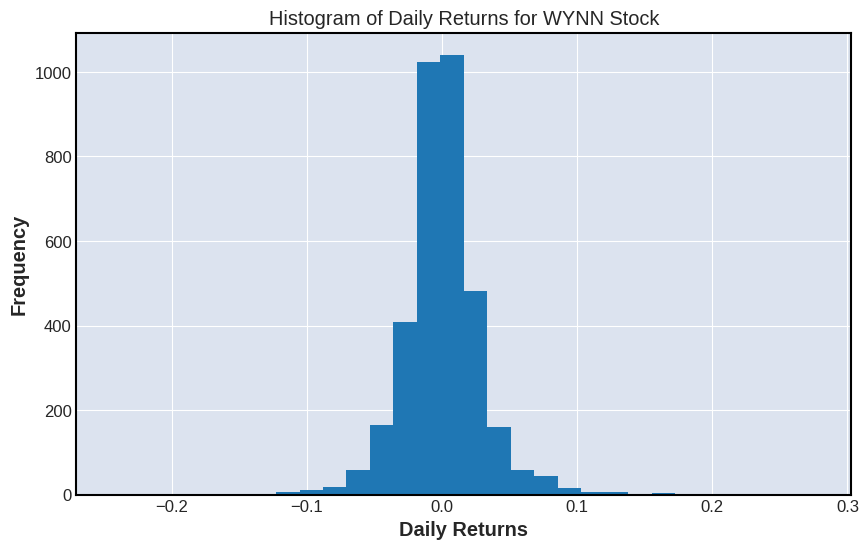

In [104]:
plt.figure(figsize=(10, 6))
( Raw_price_for_my_tickers['WYNN']['Close'].pct_change()).hist(bins=30)
plt.title('Histogram of Daily Returns for WYNN Stock')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

According to the Random walks theory, prediction of next days stock closing price is not dependent to anything and it can goes up or down. Based on out plots we can see that if we relay on the previos day for out prediction and getting the trend downward or upward from the charts trend we can get high accuraccy because of the semi-normal values.



So in the marketing data if we look too backward we might get incorrect data and it is better to look a few days before what day we want to predict.

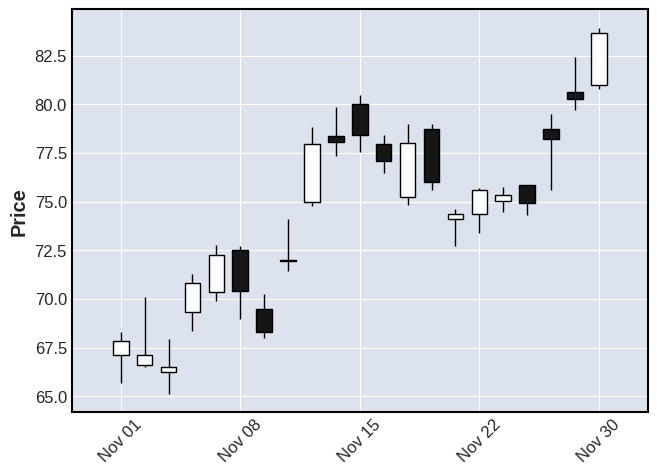

In [106]:
wynn_data = Raw_price_for_my_tickers['WYNN']
wynn_data_november = wynn_data['2022-11-01':'2022-11-30']

mpf.plot(wynn_data_november, type='candle')


## 3-1. TimeSeriesSplit

here we only keep:
selected_tickers = ['AMZN', 'MSFT', 'AAPL', 'META', 'GOOGL']


In [107]:
selected_tickers = ['AMZN', 'MSFT', 'AAPL','META','GOOGL']
data_full_scaled_sp500 = yf.download(selected_tickers, start="2010-01-04", interval="1d", group_by="ticker")
data_full_scaled_sp500_cleaned = data_full_scaled_sp500.dropna()
data_full_scaled_sp500_cleaned

[*********************100%%**********************]  5 of 5 completed


META                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2012-05-18   42.049999   45.000000   38.000000   38.230000   38.230000   
2012-05-21   36.529999   36.660000   33.000000   34.029999   34.029999   
2012-05-22   32.610001   33.590000   30.940001   31.000000   31.000000   
2012-05-23   31.370001   32.500000   31.360001   32.000000   32.000000   
2012-05-24   32.950001   33.209999   31.770000   33.029999   33.029999   
...                ...         ...         ...         ...         ...   
2023-12-15  331.989990  338.660004  331.220001  334.920013  334.920013   
2023-12-18  337.480011  347.559998  337.019989  344.619995  344.619995   
2023-12-19  345.579987  353.600006  345.119995  350.359985  350.359985   
2023-12-20  348.649994  354.959991  347.790009  349.279999  349.279999   
2023-12-21  352.980011  356.410004  349.209991  354.089996  354.089996   

                               MSFT                                      ...  \
                 Volume        Open        High         Low       Close  ...   
Date                                                                     ...   
2012-05-18  573576400.0   29.790001   29.809999   29.170000   29.270000  ...   
2012-05-21  168192700.0   29.100000   29.790001   29.059999   29.750000  ...   
2012-05-22  101786600.0   29.690001   29.879999   29.500000   29.760000  ...   
2012-05-23   73600000.0   29.350000   29.400000   28.639999   29.110001  ...   
2012-05-24   50237200.0   29.160000   29.299999   28.760000   29.070000  ...   
...                 ...         ...         ...         ...         ...  ...   
2023-12-15   30001600.0  366.850006  372.399994  366.279999  370.730011  ...   
2023-12-18   18993900.0  369.450012  373.000000  368.679993  372.649994  ...   
2023-12-19   17729400.0  371.489990  373.260010  369.839996  373.260010  ...   
2023-12-20   16369900.0  375.000000  376.029999  370.529999  370.619995  ...   
2023-12-21   15269500.0  372.559998  374.410004  370.040009  373.540009  ...   

                  AAPL                                          GOOGL  \
                   Low       Close   Adj Close     Volume        Open   
Date                                                                    
2012-05-18   18.649286   18.942142   16.056877  732292400   15.643143   
2012-05-21   19.073214   20.045713   16.992344  631106000   15.027778   
2012-05-22   19.735001   19.891787   16.861868  694870400   15.351351   
2012-05-23   19.758215   20.377144   17.273294  584897600   15.056306   
2012-05-24   20.043928   20.190001   17.114658  496230000   15.244244   
...                ...         ...         ...        ...         ...   
2023-12-15  197.000000  197.570007  197.570007  128256700  131.619995   
2023-12-18  194.389999  195.889999  195.889999   55751900  132.630005   
2023-12-19  195.889999  196.940002  196.940002   40714100  136.839996   
2023-12-20  194.830002  194.830002  194.830002   52242800  138.970001   
2023-12-21  193.500000  194.679993  194.679993   46432100  139.490005   

                                                                       
                  High         Low       Close   Adj Close     Volume  
Date                                                                   
2012-05-18   15.826326   14.932432   15.025025   15.025025  238701060  
2012-05-21   15.407658   15.015015   15.368118   15.368118  122892984  
2012-05-22   15.360611   14.914915   15.035035   15.035035  121953924  
2012-05-23   15.255255   14.942943   15.251752   15.251752  126996876  
2012-05-24   15.313313   14.986737   15.106607   15.106607   75576348  
...                ...         ...         ...         ...        ...  
2023-12-15  133.509995  131.179993  132.600006  132.600006   50815200  
2023-12-18  137.149994  132.429993  135.800003  135.800003   32258000  
2023-12-19  137.470001  136.080002  136.64999

Here in time series cross validation is not possible as before:

https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

The method that can be used for cross-validating the time-series model is cross-validation on a rolling basis. Start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted.

The idea of cross-validation should be more straightforward to grasp when we look at an example. Imagine that we have only 5 observations in our cross-validation set and we want to perform 4-fold cross-validation.

Here is the dataset: [1, 2, 3, 4, 5]

There is only one way to generate such pairs from my dataset. As a result, I get 4 pairs of training/test sets:

- Training: [1] Test: [2]

- Training: [1, 2] Test: [3]

- Training: [1, 2, 3] Test: [4]

- Training: [1, 2, 3, 4] Test: [5]

Compute the average of the accuracies of the 4 test fold.

In [108]:
cv_n_splits = 5
tss = sklearn.model_selection.TimeSeriesSplit(n_splits = cv_n_splits )

## 4-1. Preparing input and output model

**The input of the model** is the data of previous days. This data can only include the price close of the last few days. Or it can include open, high, low, and volume data. To reduce dimensionality, usually only price close is used to train the model.

**The output of the price model** is a specific day in the future (Horizon). For this exercise, you will only predict the next day's data

In [109]:

window_size = 5
cv_n_splits = 5
tss = sklearn.model_selection.TimeSeriesSplit(n_splits=cv_n_splits)

x_tickers_sp500 = []
y_tickers_sp500 = []

x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Loop through each ticker
for ticker_name in selected_tickers:
    X_time_series = []
    Y_time_series = []

    for i in range(window_size, len(data_full_scaled_sp500_cleaned[ticker_name])):
      X_time_series.append( data_full_scaled_sp500_cleaned[ticker_name]['Close'][i-window_size:i])
      Y_time_series.append( data_full_scaled_sp500_cleaned[ticker_name]['Close'][i])

    X_time_series = np.array(X_time_series)
    Y_time_series = np.array(Y_time_series)

    x_tickers_sp500.append( X_time_series[(31 - window_size):])
    y_tickers_sp500.append( Y_time_series[(31 - window_size):])




In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_tickers_sp500_normalized = [scaler.fit_transform(array) for array in x_tickers_sp500]
y_tickers_sp500_normalized = [scaler.fit_transform(array.reshape(-1, 1)) for array in y_tickers_sp500]
print("Length of y_tickers_sp500[0]:", len(y_tickers_sp500_normalized[0]))
print("Length of x_tickers_sp500[0]:", len(x_tickers_sp500_normalized[0]))


Length of y_tickers_sp500[0]: 2887
Length of x_tickers_sp500[0]: 2887


In [111]:
print(len(x_tickers_sp500[0]))
print(len(y_tickers_sp500[0]))


2887
2887


## 5-1. Neural network models with memory

In [112]:
import random
number_of_runs = 0
seed_value = 2

In [113]:
for ticker_name in selected_tickers:
  full_data = data_full_scaled_sp500_cleaned[ticker_name]
  print(ticker_name , len(full_data))
  #print(full_data['Close'][0])

  # Time series split
  for j, (train_index, test_index) in enumerate(tss.split(full_data)):

    #Different seeds
    for new_seed in range(5):
#      seed_value = new_seed
      random.seed(seed_value)
      np.random.seed(seed_value)
      tf.random.set_seed(seed_value)
      keras.utils.set_random_seed(seed_value)

      number_of_runs += 1

      train_data = full_data['Close'][train_index]
      test_data = full_data['Close'][test_index]

AMZN 2918
MSFT 2918
AAPL 2918
META 2918
GOOGL 2918


In [114]:
train_data.head()


Date
2012-05-18    15.025025
2012-05-21    15.368118
2012-05-22    15.035035
2012-05-23    15.251752
2012-05-24    15.106607
Name: Close, dtype: float64

In [115]:
test_data.head()


Date
2022-01-18    135.998001
2022-01-19    135.116501
2022-01-20    133.307495
2022-01-21    130.351501
2022-01-24    130.804001
Name: Close, dtype: float64

In [116]:
print(test_data.shape)
print(len(x_tickers_sp500_normalized[0]))

(486,)
2887


### 5-1.1 LSTM model

In [117]:
x_train = np.concatenate(x_tickers_sp500_normalized, axis=0)
y_train = np.concatenate(y_tickers_sp500_normalized, axis=0)


In [118]:
x_tickers_sp500_unscaled = [array for array in x_tickers_sp500]
y_tickers_sp500_unscaled = [array.reshape(-1, 1) for array in y_tickers_sp500]
x_train_unscaled = np.concatenate(x_tickers_sp500_unscaled, axis=0)
y_train_unscaled = np.concatenate(y_tickers_sp500_unscaled, axis=0)

x_train_unscaled = x_train_unscaled.reshape((x_train_unscaled.shape[0], x_train_unscaled.shape[1], 1))

In [119]:
x_train_unscaled.shape

(14435, 5, 1)

In [120]:
x_train.shape

(14435, 5)

In [121]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))


In [122]:
x_train.shape

(14435, 5, 1)

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import RepeatVector


In [124]:
input_shape = (x_train.shape[1], x_train.shape[2])

In [125]:
def plot_loss(history, model_name):
  plt.plot(history.history['loss'])
  plt.title(f'{model_name} Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()


In [126]:
def prediction(model):
    prediction = model.predict(x_train)
    # prediction = scaler.inverse_transform(prediction)
    return prediction

def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    mae = np.abs(errors).mean()
    # mape = np.mean(np.abs(errors / np.maximum(np.abs(actual), 1))) * 100
    mask = actual != 0
    mape = np.mean(np.abs(errors[mask] / np.maximum(np.abs(actual[mask]), 1))) * 100

    print(model_name + ':')
    print('Mean Square Error: {:.4f}'.format(mse))
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Mean Absolute Percentage Error: {:.4f}%'.format(mape))
    print('')


Epoch 1/10
97/97 [==============================] - 4s 6ms/step - loss: 15188.1094
Epoch 2/10
97/97 [==============================] - 1s 6ms/step - loss: 13769.9238
Epoch 3/10
97/97 [==============================] - 1s 6ms/step - loss: 12932.0791
Epoch 4/10
97/97 [==============================] - 1s 6ms/step - loss: 12196.0508
Epoch 5/10
97/97 [==============================] - 1s 6ms/step - loss: 11537.2217
Epoch 6/10
97/97 [==============================] - 1s 6ms/step - loss: 10941.8965
Epoch 7/10
97/97 [==============================] - 1s 6ms/step - loss: 10327.1689
Epoch 8/10
97/97 [==============================] - 1s 6ms/step - loss: 9777.1025
Epoch 9/10
97/97 [==============================] - 1s 6ms/step - loss: 9264.7383
Epoch 10/10
97/97 [==============================] - 1s 6ms/step - loss: 8784.4238


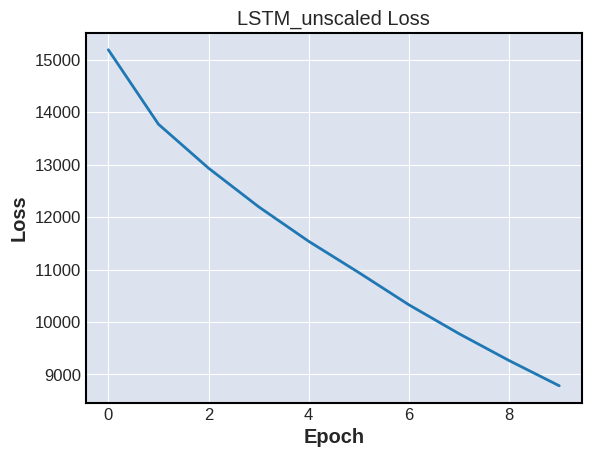

In [127]:
input_shape_unscaled = (x_train_unscaled.shape[1], x_train_unscaled.shape[2])
lstm_model_unscaled = Sequential()
lstm_model_unscaled.add(LSTM(units=50, return_sequences = True, activation='tanh', input_shape=input_shape_unscaled))
lstm_model_unscaled.add(LSTM(units=50, activation='tanh'))
lstm_model_unscaled.add(Dense(units=1))

lstm_model_unscaled.compile(optimizer='adam', loss='mse')

lstm_history_unscaled = lstm_model_unscaled.fit(x_train_unscaled, y_train_unscaled, epochs=10, batch_size = 150)

plot_loss(lstm_history_unscaled, 'LSTM_unscaled')


Epoch 1/10
97/97 [==============================] - 4s 6ms/step - loss: 0.0188
Epoch 2/10
97/97 [==============================] - 1s 6ms/step - loss: 3.3953e-04
Epoch 3/10
97/97 [==============================] - 1s 6ms/step - loss: 2.7700e-04
Epoch 4/10
97/97 [==============================] - 1s 6ms/step - loss: 2.6447e-04
Epoch 5/10
97/97 [==============================] - 1s 6ms/step - loss: 2.6420e-04
Epoch 6/10
97/97 [==============================] - 1s 6ms/step - loss: 2.6079e-04
Epoch 7/10
97/97 [==============================] - 1s 6ms/step - loss: 2.5969e-04
Epoch 8/10
97/97 [==============================] - 1s 7ms/step - loss: 2.6371e-04
Epoch 9/10
97/97 [==============================] - 1s 8ms/step - loss: 2.6031e-04
Epoch 10/10
97/97 [==============================] - 1s 8ms/step - loss: 2.5589e-04


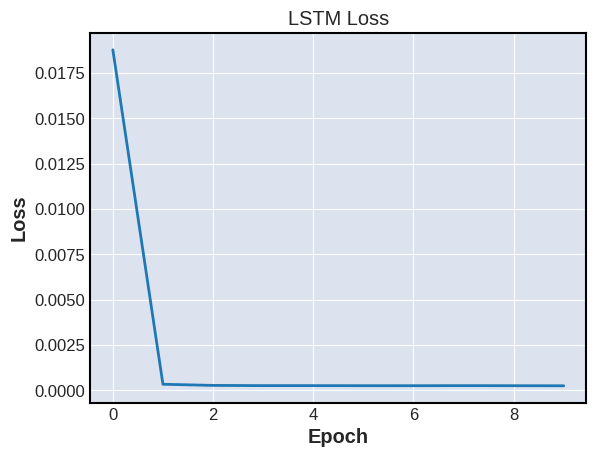

Epoch 1/10
97/97 [==============================] - 1s 6ms/step - loss: 0.1848
Epoch 2/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0202
Epoch 3/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0197
Epoch 4/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0195
Epoch 5/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0196
Epoch 6/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0195
Epoch 7/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0196
Epoch 8/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0194
Epoch 9/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0194
Epoch 10/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0195


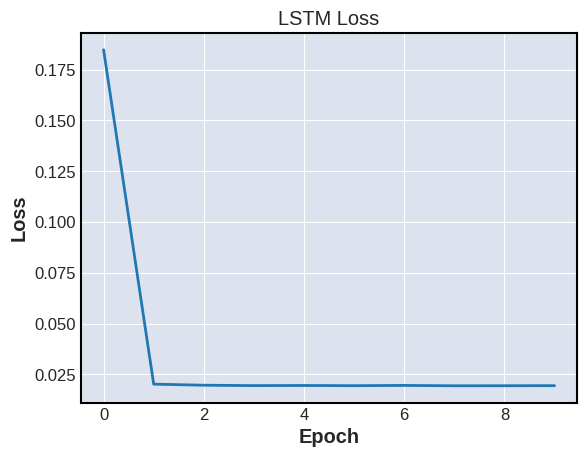

In [128]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences = True, activation='tanh', input_shape=input_shape))
lstm_model.add(LSTM(units=50, activation='tanh'))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mse')

lstm_history = lstm_model.fit(x_train, y_train, epochs=10, batch_size = 150)

plot_loss(lstm_history, 'LSTM')

lstm_history = lstm_model.fit(x_train_unscaled, y_train, epochs=10, batch_size = 150)

plot_loss(lstm_history, 'LSTM')

### 5-1.2 GRU model

In [129]:
from tensorflow.keras.layers import GRU, Dense, Dropout

Epoch 1/10
97/97 [==============================] - 4s 5ms/step - loss: 14970.5576
Epoch 2/10
97/97 [==============================] - 1s 6ms/step - loss: 13699.1699
Epoch 3/10
97/97 [==============================] - 1s 5ms/step - loss: 12892.4111
Epoch 4/10
97/97 [==============================] - 1s 5ms/step - loss: 12172.3789
Epoch 5/10
97/97 [==============================] - 1s 5ms/step - loss: 11523.5156
Epoch 6/10
97/97 [==============================] - 1s 5ms/step - loss: 10917.5957
Epoch 7/10
97/97 [==============================] - 1s 6ms/step - loss: 10316.3496
Epoch 8/10
97/97 [==============================] - 1s 7ms/step - loss: 9771.8789
Epoch 9/10
97/97 [==============================] - 1s 8ms/step - loss: 9263.3994
Epoch 10/10
97/97 [==============================] - 1s 7ms/step - loss: 8786.0010


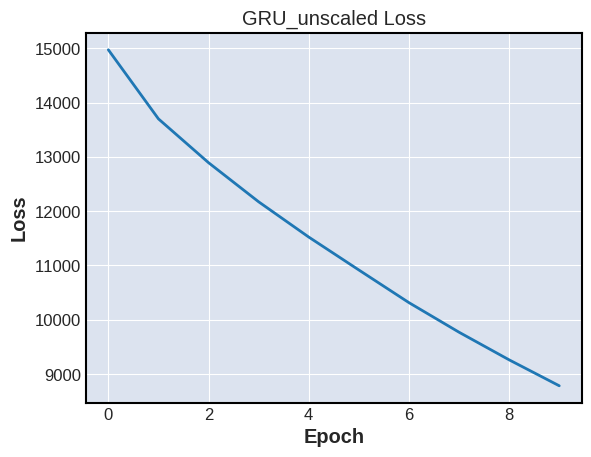

In [130]:
gru_model_unscaled = Sequential()
gru_model_unscaled.add(GRU(units=50, return_sequences = True, activation='tanh', input_shape=input_shape_unscaled))
gru_model_unscaled.add(GRU(units=50, activation='tanh'))
gru_model_unscaled.add(Dense(units=1))

gru_model_unscaled.compile(optimizer='adam', loss='mse')
gru_history_unscaled = gru_model_unscaled.fit(x_train_unscaled, y_train_unscaled, epochs=10, batch_size = 150)

plot_loss(gru_history_unscaled, 'GRU_unscaled')

In [ ]:
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences = True, activation='tanh', input_shape=input_shape))
gru_model.add(GRU(units=50, activation='tanh'))
gru_model.add(Dense(units=1))

gru_model.compile(optimizer='adam', loss='mse')
gru_history = gru_model.fit(x_train, y_train, epochs=10, batch_size = 150)

plot_loss(gru_history, 'GRU')

### 5-1.3 Bidirectional LSTM (Bi-LSTM) Model:

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout


Epoch 1/10
97/97 [==============================] - 8s 9ms/step - loss: 14207.5479
Epoch 2/10
97/97 [==============================] - 1s 12ms/step - loss: 11938.9111
Epoch 3/10
97/97 [==============================] - 1s 13ms/step - loss: 10645.9678
Epoch 4/10
97/97 [==============================] - 1s 12ms/step - loss: 9480.8398
Epoch 5/10
97/97 [==============================] - 1s 12ms/step - loss: 8497.4834
Epoch 6/10
97/97 [==============================] - 2s 16ms/step - loss: 7644.7134
Epoch 7/10
97/97 [==============================] - 1s 10ms/step - loss: 6895.2241
Epoch 8/10
97/97 [==============================] - 1s 8ms/step - loss: 6234.3408
Epoch 9/10
97/97 [==============================] - 1s 9ms/step - loss: 5650.1299
Epoch 10/10
97/97 [==============================] - 1s 8ms/step - loss: 5131.3140


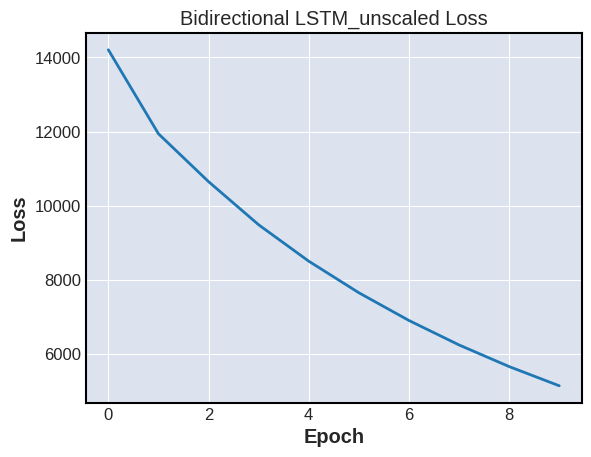

In [133]:
bilstm_model_unscaled = Sequential()
bilstm_model_unscaled.add(Bidirectional(LSTM(units=50, return_sequences = True, activation='tanh', input_shape=input_shape)))
bilstm_model_unscaled.add(Bidirectional(LSTM(units=50, activation='tanh')))
bilstm_model_unscaled.add(Dense(units=1))

bilstm_model_unscaled.compile(optimizer='adam', loss='mse')
bilstm_history_unscaled = bilstm_model_unscaled.fit(x_train_unscaled, y_train_unscaled, epochs=10, batch_size = 150)

plot_loss(bilstm_history_unscaled, 'Bidirectional LSTM_unscaled')

In [ ]:
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=50, return_sequences = True, activation='tanh', input_shape=input_shape)))
bilstm_model.add(Bidirectional(LSTM(units=50, activation='tanh')))
bilstm_model.add(Dense(units=1))

bilstm_model.compile(optimizer='adam', loss='mse')
bilstm_history = bilstm_model.fit(x_train, y_train, epochs=10, batch_size = 150)

plot_loss(bilstm_history, 'Bidirectional LSTM')

In [135]:
prediction_lstm_unscaled = prediction(lstm_model_unscaled)
prediction_gru_unscaled = prediction(gru_model_unscaled)
prediction_bilstm_unscaled = prediction(bilstm_model_unscaled)

evaluate_prediction(prediction_lstm_unscaled, y_train, 'LSTM_unscaled')
evaluate_prediction(prediction_gru_unscaled, y_train, 'GRU_unscaled')
evaluate_prediction(prediction_bilstm_unscaled, y_train, 'Bi-LSTM_unscaled')

452/452 [==============================] - 3s 3ms/step
LSTM_unscaled:
Mean Square Error: 3.9833
Mean Absolute Error: 1.9791
Mean Absolute Percentage Error: 197.8994%

GRU_unscaled:
Mean Square Error: 441.4863
Mean Absolute Error: 21.0079
Mean Absolute Percentage Error: 2100.8035%

Bi-LSTM_unscaled:
Mean Square Error: 19.0720
Mean Absolute Error: 4.3564
Mean Absolute Percentage Error: 435.6290%



In [161]:
prediction_lstm = prediction(lstm_model)
prediction_gru = prediction(gru_model)
prediction_bilstm = prediction(bilstm_model)

evaluate_prediction(prediction_lstm, y_train, 'LSTM')
evaluate_prediction(prediction_gru, y_train, 'GRU')
evaluate_prediction(prediction_bilstm, y_train, 'Bi-LSTM')

452/452 [==============================] - 2s 3ms/step
LSTM:
Mean Square Error: 0.1770
Mean Absolute Error: 0.3156
Mean Absolute Percentage Error: 31.5677%

GRU:
Mean Square Error: 0.0002
Mean Absolute Error: 0.0082
Mean Absolute Percentage Error: 0.8152%

Bi-LSTM:
Mean Square Error: 0.0002
Mean Absolute Error: 0.0082
Mean Absolute Percentage Error: 0.8235%



### 5-1.4 Multi-Layer Perceptron (MLP) Model:


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [ ]:
x_train_flatten = x_train.reshape((x_train.shape[0], -1))

In [139]:
x_train_flatten_unscaled =  x_train_unscaled.reshape((x_train_unscaled.shape[0], -1))

In [140]:
mlp_model_unscaled = Sequential()
mlp_model_unscaled.add(Dense(units=256, activation='relu', input_shape=(x_train_flatten_unscaled.shape[1],)))
mlp_model_unscaled.add(Dense(units=1, activation='linear'))

mlp_model_unscaled.compile(optimizer='adam', loss='mse')

mlp_model_unscaled.fit(x_train_unscaled, y_train_unscaled, epochs=10, verbose=1)

Epoch 1/10
452/452 [==============================] - 2s 4ms/step - loss: 192.0488
Epoch 2/10
452/452 [==============================] - 2s 3ms/step - loss: 13.5719
Epoch 3/10
452/452 [==============================] - 1s 3ms/step - loss: 11.9077
Epoch 4/10
452/452 [==============================] - 1s 3ms/step - loss: 10.5094
Epoch 5/10
452/452 [==============================] - 1s 3ms/step - loss: 9.9883
Epoch 6/10
452/452 [==============================] - 1s 3ms/step - loss: 10.3664
Epoch 7/10
452/452 [==============================] - 1s 3ms/step - loss: 10.2772
Epoch 8/10
452/452 [==============================] - 1s 3ms/step - loss: 9.5066
Epoch 9/10
452/452 [==============================] - 1s 3ms/step - loss: 9.8952
Epoch 10/10
452/452 [==============================] - 1s 3ms/step - loss: 9.6733


In [153]:
mlp_model = Sequential()
mlp_model.add(Dense(units=256, activation='relu', input_shape=(x_train_flatten.shape[1],)))
mlp_model.add(Dense(units=1, activation='linear'))

mlp_model.compile(optimizer='adam', loss='mse')

In [154]:
mlp_model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
452/452 [==============================] - 2s 3ms/step - loss: 9.2617e-04
Epoch 2/10
452/452 [==============================] - 2s 4ms/step - loss: 1.7160e-04
Epoch 3/10
452/452 [==============================] - 2s 4ms/step - loss: 1.5607e-04
Epoch 4/10
452/452 [==============================] - 1s 3ms/step - loss: 1.3614e-04
Epoch 5/10
452/452 [==============================] - 1s 3ms/step - loss: 1.3645e-04
Epoch 6/10
452/452 [==============================] - 1s 3ms/step - loss: 1.4748e-04
Epoch 7/10
452/452 [==============================] - 1s 3ms/step - loss: 1.3526e-04
Epoch 8/10
452/452 [==============================] - 1s 3ms/step - loss: 1.2963e-04
Epoch 9/10
452/452 [==============================] - 1s 3ms/step - loss: 1.2991e-04
Epoch 10/10
452/452 [==============================] - 1s 3ms/step - loss: 1.4401e-04


### 5-1.5 Convolutional Neural Network (CNN) Model:


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


In [155]:
input_shape_cnn = (x_train.shape[1], x_train.shape[2])


In [145]:
input_shape_cnn_unscaled = (x_train_unscaled.shape[1], x_train_unscaled.shape[2])

In [146]:
cnn_model_unscaled = Sequential()
cnn_model_unscaled.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape_cnn_unscaled))
cnn_model_unscaled.add(MaxPooling1D(pool_size=2))

cnn_model_unscaled.add(Dense(units=1, activation='linear'))
cnn_model_unscaled.compile(optimizer='adam', loss='mse')

In [147]:
cnn_model_unscaled.fit(x_train_unscaled, y_train_unscaled, epochs=10, verbose=1)

Epoch 1/10
452/452 [==============================] - 2s 3ms/step - loss: 184.1077
Epoch 2/10
452/452 [==============================] - 2s 5ms/step - loss: 20.8795
Epoch 3/10
452/452 [==============================] - 2s 4ms/step - loss: 20.7530
Epoch 4/10
452/452 [==============================] - 1s 3ms/step - loss: 20.6363
Epoch 5/10
452/452 [==============================] - 1s 3ms/step - loss: 20.5696
Epoch 6/10
452/452 [==============================] - 1s 3ms/step - loss: 20.2753
Epoch 7/10
452/452 [==============================] - 2s 3ms/step - loss: 20.2123
Epoch 8/10
452/452 [==============================] - 1s 3ms/step - loss: 20.1034
Epoch 9/10
452/452 [==============================] - 2s 3ms/step - loss: 19.8552
Epoch 10/10
452/452 [==============================] - 2s 5ms/step - loss: 19.4204


In [148]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape_cnn))
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Dense(units=1, activation='linear'))
cnn_model.compile(optimizer='adam', loss='mse')

In [149]:
cnn_model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
452/452 [==============================] - 2s 3ms/step - loss: 0.0102
Epoch 2/10
452/452 [==============================] - 2s 3ms/step - loss: 2.7998e-04
Epoch 3/10
452/452 [==============================] - 2s 3ms/step - loss: 2.7431e-04
Epoch 4/10
452/452 [==============================] - 2s 5ms/step - loss: 2.7496e-04
Epoch 5/10
452/452 [==============================] - 2s 4ms/step - loss: 2.7336e-04
Epoch 6/10
452/452 [==============================] - 2s 3ms/step - loss: 2.6497e-04
Epoch 7/10
452/452 [==============================] - 2s 3ms/step - loss: 2.6438e-04
Epoch 8/10
452/452 [==============================] - 2s 4ms/step - loss: 2.6051e-04
Epoch 9/10
452/452 [==============================] - 2s 3ms/step - loss: 2.6178e-04
Epoch 10/10
452/452 [==============================] - 2s 4ms/step - loss: 2.5069e-04


### 5-1.6 Convolutional LSTM Model:



Epoch 1/10
97/97 [==============================] - 8s 37ms/step - loss: 14934.1543
Epoch 2/10
97/97 [==============================] - 6s 64ms/step - loss: 13535.3301
Epoch 3/10
97/97 [==============================] - 4s 41ms/step - loss: 12726.3359
Epoch 4/10
97/97 [==============================] - 4s 38ms/step - loss: 12010.4434
Epoch 5/10
97/97 [==============================] - 4s 40ms/step - loss: 11368.3438
Epoch 6/10
97/97 [==============================] - 5s 49ms/step - loss: 10791.2051
Epoch 7/10
97/97 [==============================] - 4s 37ms/step - loss: 10271.1973
Epoch 8/10
97/97 [==============================] - 4s 37ms/step - loss: 9802.9941
Epoch 9/10
97/97 [==============================] - 5s 53ms/step - loss: 9383.5459
Epoch 10/10
97/97 [==============================] - 4s 38ms/step - loss: 9008.1924


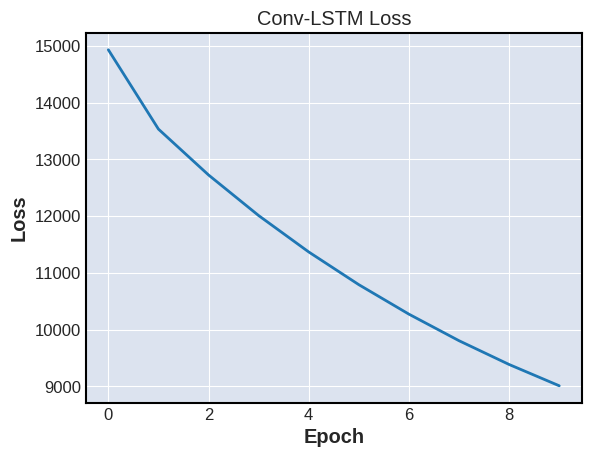

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense


x_train_reshaped_unscaled = x_train_unscaled.reshape((x_train_unscaled.shape[0], x_train_unscaled.shape[1], 1, x_train_unscaled.shape[2], 1))

# Build the Conv-LSTM model
input_shape_unscaled = (5, 1, 1, 1)
conv_lstm_model_unscaled = Sequential()
conv_lstm_model_unscaled.add(ConvLSTM2D(filters=50, kernel_size=(1, 3), activation='tanh', padding='same', input_shape=input_shape, return_sequences=True))
conv_lstm_model_unscaled.add(ConvLSTM2D(filters=50, kernel_size=(1, 3), activation='tanh', padding='same'))
conv_lstm_model_unscaled.add(Dense(units=1))

conv_lstm_model_unscaled.compile(optimizer='adam', loss='mse')

# Train the model with the reshaped data
conv_lstm_history_unscaled = conv_lstm_model_unscaled.fit(x_train_reshaped_unscaled, y_train_unscaled, epochs=10, batch_size=150)

# Plot the loss
plot_loss(conv_lstm_history_unscaled, 'Conv-LSTM')

Epoch 1/10
97/97 [==============================] - 10s 59ms/step - loss: 0.0942
Epoch 2/10
97/97 [==============================] - 9s 90ms/step - loss: 0.0826
Epoch 3/10
97/97 [==============================] - 7s 70ms/step - loss: 0.0826
Epoch 4/10
97/97 [==============================] - 4s 37ms/step - loss: 0.0826
Epoch 5/10
97/97 [==============================] - 4s 37ms/step - loss: 0.0826
Epoch 6/10
97/97 [==============================] - 5s 53ms/step - loss: 0.0825
Epoch 7/10
97/97 [==============================] - 4s 37ms/step - loss: 0.0825
Epoch 8/10
97/97 [==============================] - 4s 37ms/step - loss: 0.0825
Epoch 9/10
97/97 [==============================] - 5s 54ms/step - loss: 0.0826
Epoch 10/10
97/97 [==============================] - 4s 38ms/step - loss: 0.0826


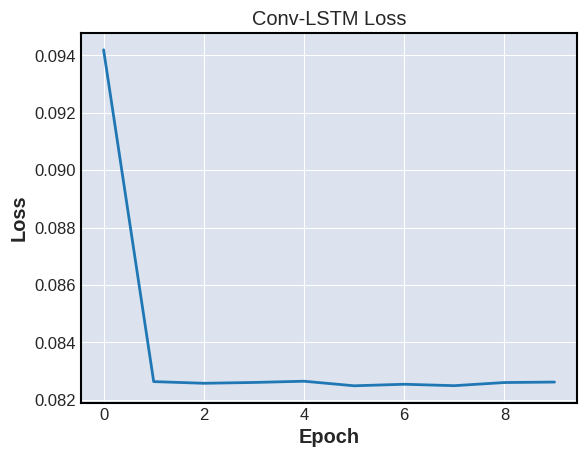

In [156]:
# Reshape the input data to have the necessary dimensions
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1, x_train.shape[2], 1))

# Build the Conv-LSTM model
input_shape = (5, 1, 1, 1)
conv_lstm_model = Sequential()
conv_lstm_model.add(ConvLSTM2D(filters=50, kernel_size=(1, 3), activation='tanh', padding='same', input_shape=input_shape, return_sequences=True))
conv_lstm_model.add(ConvLSTM2D(filters=50, kernel_size=(1, 3), activation='tanh', padding='same'))
conv_lstm_model.add(Dense(units=1))

conv_lstm_model.compile(optimizer='adam', loss='mse')

# Train the model with the reshaped data
conv_lstm_history = conv_lstm_model.fit(x_train_reshaped, y_train, epochs=10, batch_size=150)

# Plot the loss
plot_loss(conv_lstm_history, 'Conv-LSTM')


In [158]:
x_train_reshaped_unscaled
prediction_mlp_unscaled = prediction(mlp_model_unscaled)
prediction_cnn_unscaled = prediction(cnn_model_unscaled)

x_train_reshaped_unscaled = x_train_unscaled.reshape((x_train_unscaled.shape[0], x_train_unscaled.shape[1], 1, x_train_unscaled.shape[2], 1))
prediction_conv_lstm_unscaled = conv_lstm_model_unscaled.predict(x_train_reshaped_unscaled)

evaluate_prediction(prediction_mlp_unscaled, y_train, 'MLP_unscaled')
evaluate_prediction(prediction_cnn_unscaled.reshape((14435, 1)), y_train, 'CNN_unscaled')
evaluate_prediction(prediction_conv_lstm_unscaled.reshape((14435, 1)), y_train, 'Conv-LSTM')

452/452 [==============================] - 5s 10ms/step
MLP_unscaled:
Mean Square Error: 0.0074
Mean Absolute Error: 0.0847
Mean Absolute Percentage Error: 8.4758%

CNN_unscaled:
Mean Square Error: 0.0296
Mean Absolute Error: 0.1712
Mean Absolute Percentage Error: 17.1206%

Conv-LSTM:
Mean Square Error: 2881.3953
Mean Absolute Error: 53.6779
Mean Absolute Percentage Error: 5367.7749%



In [159]:
prediction_mlp = prediction(mlp_model)
prediction_cnn = prediction(cnn_model)

x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1, x_train.shape[2], 1))
prediction_conv_lstm = conv_lstm_model.predict(x_train_reshaped)

evaluate_prediction(prediction_mlp, y_train, 'MLP')
evaluate_prediction(prediction_cnn.reshape((14435, 1)), y_train, 'CNN')
evaluate_prediction(prediction_conv_lstm.reshape((14435, 1)), y_train, 'Conv-LSTM')

452/452 [==============================] - 4s 8ms/step
MLP:
Mean Square Error: 0.0002
Mean Absolute Error: 0.0089
Mean Absolute Percentage Error: 0.8887%

CNN:
Mean Square Error: 0.0003
Mean Absolute Error: 0.0106
Mean Absolute Percentage Error: 1.0608%

Conv-LSTM:
Mean Square Error: 0.0809
Mean Absolute Error: 0.2474
Mean Absolute Percentage Error: 24.7370%



#Naïve Forecast

In [160]:
x_train_naive_forcast = x_train.reshape((14435, 5))
print(x_train_naive_forcast.shape)

(14435, 5)


Original y_train:
 [0.00403009 0.0033276  0.00275593 ... 0.90271252 0.91517914 0.93052266]

Naïve Forecast:
 [0.         0.00403009 0.0033276  ... 0.89644241 0.90271252 0.91517914]


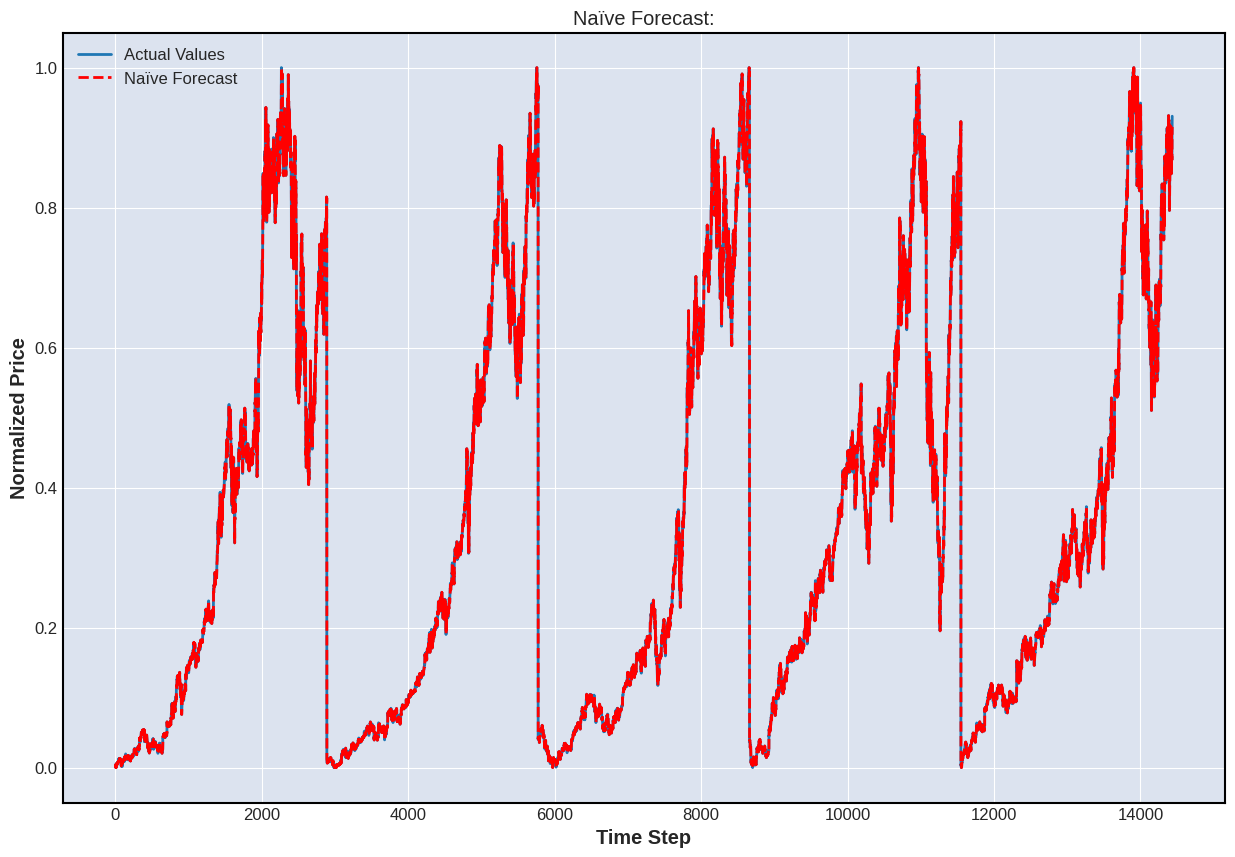

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Function to implement Naïve Forecast for univariate time series
def naive_forecast(x_train, y_train):
    # Shift the y_train values by one time step
    naive_forecasted = np.roll(y_train, shift=1, axis=0)
    naive_forecasted[0] = 0  # Set the first value to NaN since there is no previous value for the first time step
    return naive_forecasted

# Apply Naïve Forecast to the dataset
naive_forecasted = naive_forecast(x_train, y_train)

# Print the resulting arrays with Naïve Forecast
print("Original y_train:\n", y_train[:, 0])
print("\nNaïve Forecast:\n", naive_forecasted[:, 0])

# Plot the actual values and Naïve Forecast
plt.figure(figsize=(15, 10))
plt.plot(y_train[:, 0], label='Actual Values')
plt.plot(naive_forecasted[:, 0], label='Naïve Forecast', linestyle='dashed', color='red')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.legend()
plt.title('Naïve Forecast:')
plt.show()


In [152]:
evaluate_prediction(naive_forecasted, y_train, 'Naïve Forecast')

Naïve Forecast:
Mean Square Error: 0.0003
Mean Absolute Error: 0.0060
Mean Absolute Percentage Error: 0.6023%

